![image](https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/notebooks/headers/watsonx-Prompt_Lab-Notebook.png)
# Use watsonx, and `meta-llama/llama-3-2-11b-vision-instruct` model for image processing to generate a description of the IBM logo

#### Disclaimers

- Use only Projects and Spaces that are available in watsonx context.


## Notebook content

This notebook provides a detailed demonstration of the steps and code required to showcase support for Chat models.

Some familiarity with Python is helpful. This notebook uses Python 3.11.


## Learning goal

The purpose of this notebook is to demonstrate how to use watsonx.ai Chat models with images processing.


## Table of Contents

This notebook contains the following parts:

- [Setup](#setup)
- [Prepare the data image](#image)
- [Work with Foundation Models on watsonx](#models)
- [Use the chat to answer a question about the image](#predict)
- [Summary](#summary)

<a id="setup"></a>
## Set up the environment

Before you use the sample code in this notebook, you must perform the following setup tasks:

-  Contact with your Cloud Pack for Data administrator and ask him for your account credentials

### Install and import the `datasets` and dependencies

In [ ]:
!pip install wget | tail -n 1
!pip install -U "ibm_watsonx_ai>=1.1.14" | tail -n 1

### Connection to WML

Authenticate the Watson Machine Learning service on IBM Cloud Pack for Data. You need to provide platform `url`, your `username` and `api_key`.

In [ ]:
username = 'PASTE YOUR USERNAME HERE'
api_key = 'PASTE YOUR API_KEY HERE'
url = 'PASTE THE PLATFORM URL HERE'


In [ ]:
from ibm_watsonx_ai import Credentials

credentials = Credentials(
    username=username,
    api_key=api_key,
    url=url,
    instance_id="openshift",
    version="5.1"
)


Alternatively you can use `username` and `password` to authenticate WML services.

```python
credentials = Credentials(
    username=***,
    password=***,
    url=***,
    instance_id="openshift",
    version="5.1"
)

```

### Working with projects

First of all, you need to create a project that will be used for your work. If you do not have project already created follow bellow steps.

- Open IBM Cloud Pak main page
- Click all projects
- Create an empty project
- Copy `project_id` from url and paste it below

**Action**: Assign project ID below

In [ ]:
project_id = 'PASTE YOUR PROJECT ID HERE'


<a id="image"></a>
## Data Image Preparation

Download the IBM logo.

In [4]:
import wget
import os

filename = 'ibm_logo.jpg'
url = 'https://raw.github.com/IBM/watson-machine-learning-samples/master/cloud/data/logo/ibm_logo.jpg'

if not os.path.isfile(filename):
    wget.download(url, out=filename)

Display the downloaded image.

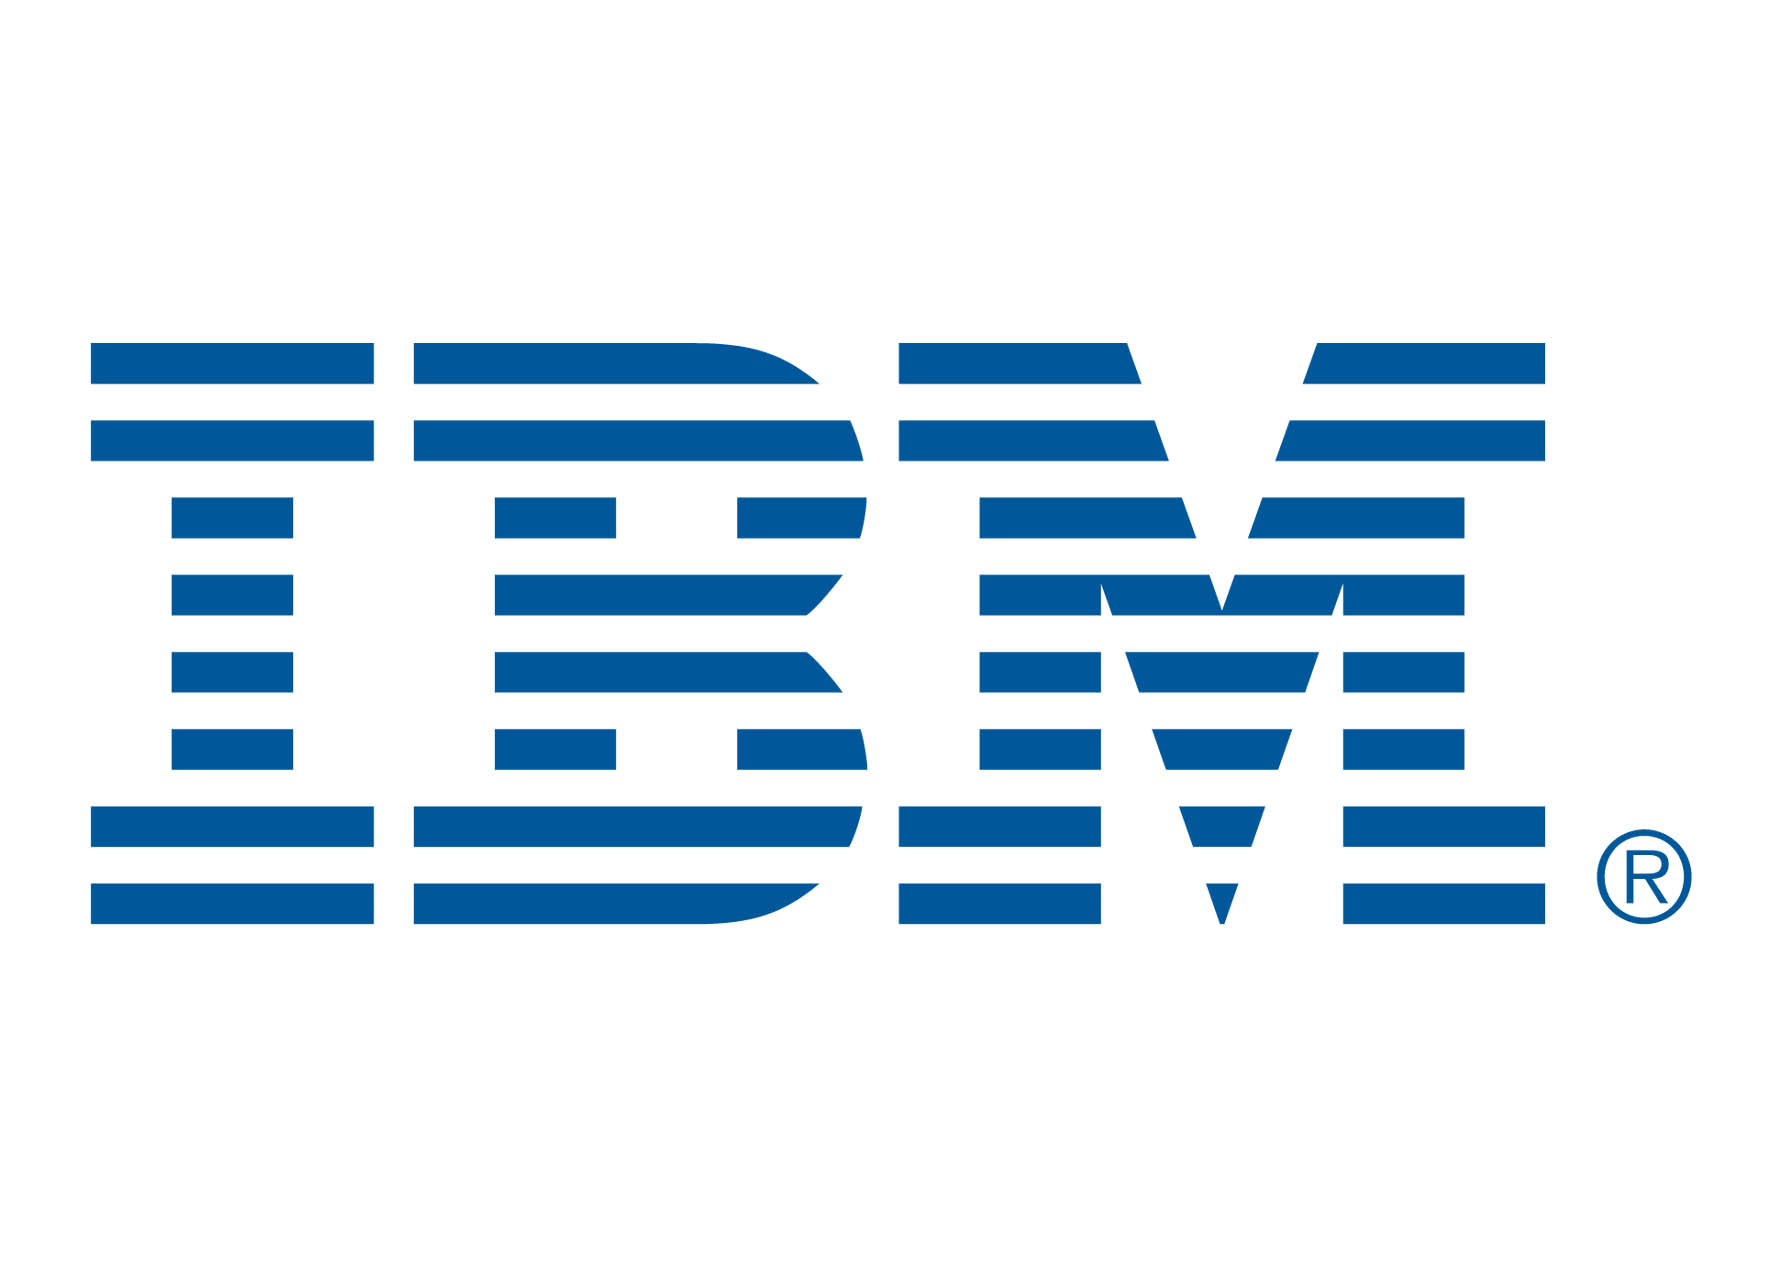

In [5]:
from IPython.display import Image

Image(filename=filename, width=600)

<a id="models"></a>
## Work with Foundation Models on `watsonx.ai`

Specify the `model_id` of the model you will use for the chat with image modalities.

In [6]:
model_id = "meta-llama/llama-3-2-11b-vision-instruct"

### Define the model parameters

You might need to adjust model `parameters` depending on the model you use.

In [7]:
from ibm_watsonx_ai.foundation_models.schema import TextChatParameters

TextChatParameters.show()

+-------------------+----------------------------------------+-------------------------+
| PARAMETER         | TYPE                                   | EXAMPLE VALUE           |
+===================+========================================+=========================+
| frequency_penalty | float, NoneType                        | 0.5                     |
+-------------------+----------------------------------------+-------------------------+
| logprobs          | bool, NoneType                         | True                    |
+-------------------+----------------------------------------+-------------------------+
| top_logprobs      | int, NoneType                          | 3                       |
+-------------------+----------------------------------------+-------------------------+
| presence_penalty  | float, NoneType                        | 0.3                     |
+-------------------+----------------------------------------+-------------------------+
| response_format   |

In [8]:
params = TextChatParameters(
    temperature=1
)

### Initialize the model

Initialize the `ModelInference` class with the previously set parameters.

In [9]:
from ibm_watsonx_ai.foundation_models import ModelInference

model = ModelInference(
    model_id=model_id,
    credentials=credentials,
    project_id=project_id,
    params=params
)

Encode the image to `base64.b64encode`.

In [10]:
import base64

with open(filename, 'rb') as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

<a id="predict"></a>
## Use the chat to answer a question about the provided image

Provide a question about the image and send it in the messages payload.

In [11]:
question = "Describe the image"

messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": question
      },
      {
        "type": "image_url",
        "image_url": {
          "url": "data:image/jpeg;base64," + encoded_string,
        }
      }
    ]
  }
]

Generate an answer to your question using the `meta-llama/llama-3-2-11b-vision-instruct` model.

In [12]:
response = model.chat(messages=messages)

Explore the generated content from the chat model.

In [13]:
print(response["choices"][0]["message"]["content"])

This image showcases the IBM logo. The icon predates IBM becoming a technology brand and represents a distinctive typographic mark akin to music staves, specifically those used for mode notation. The words "International Business Machines" had been written in the same style, and, when condensed, it became the widely recognizable logo of the well-known tech company.


Explore the output from the model.

In [14]:
response

{'id': 'chat-e284e6b5ce9e4051af3688f63c6a338a',
 'model_id': 'meta-llama/llama-3-2-11b-vision-instruct',
 'model': 'meta-llama/llama-3-2-11b-vision-instruct',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'This image showcases the IBM logo. The icon predates IBM becoming a technology brand and represents a distinctive typographic mark akin to music staves, specifically those used for mode notation. The words "International Business Machines" had been written in the same style, and, when condensed, it became the widely recognizable logo of the well-known tech company.'},
   'finish_reason': 'stop'}],
 'created': 1733296056,
 'created_at': '2024-12-04T07:07:38.277Z',
 'usage': {'completion_tokens': 70,
  'prompt_tokens': 6523,
  'total_tokens': 6593},
 'system': {'warnings': [{'message': 'This model is a Non-IBM Product governed by a third-party license that may impose use restrictions and other obligations. By using this model you agree to its terms as ide

<a id="summary"></a>
## Summary and next steps

You successfully completed this notebook!
 
You learned how to describe an image using `ModelInference`.
 
Check out our _<a href="https://ibm.github.io/watsonx-ai-python-sdk/samples.html" target="_blank" rel="noopener no referrer">Online Documentation</a>_ for more samples, tutorials, documentation, how-tos, and blog posts. 

### Author

**Mateusz Szewczyk**, Software Engineer at Watson Machine Learning.

Copyright © 2024 IBM. This notebook and its source code are released under the terms of the MIT License.